In [8]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rc
%matplotlib inline
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [9]:
# train - 3p trb blk 열 데이터 -> pos를 예측하는 knn 모델 생성
# test - 3p trb blk 열 데이터를 knn 모델에 입력 -> 예측 결과와 정답 비교 -> 정확도 출력
with open('data/pkl/basketball_train.pkl', 'rb') as train_data:
    train = pd.read_pickle(train_data)
    
with open('data/pkl/basketball_test.pkl', 'rb') as test_data:
    test = pd.read_pickle(test_data)

최적의 K 찾기 (교차 검증 - cross validdation)

In [10]:
# import kNN library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# k수 찾기, 데이터 절반의 범위
max_k_range = train.shape[0] // 2
k_list = []
for i in range(3, max_k_range, 2):
    k_list.append(i)

cross_validation_scores = []
x_train = train[['3P', 'BLK' , 'TRB']]
y_train = train[['Pos']]

# 교차 검증
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train.values.ravel(),
                             cv=10, scoring='accuracy')
    cross_validation_scores.append(scores.mean())

cross_validation_scores

[0.925,
 0.925,
 0.9375,
 0.9375,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.9125,
 0.9,
 0.8875,
 0.8625,
 0.875,
 0.85,
 0.8375,
 0.8375,
 0.8375,
 0.8375]

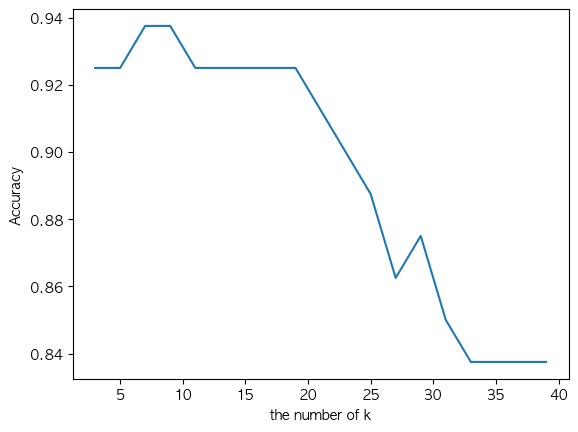

In [13]:
# k에 따른 정확도 시각화
plt.plot(k_list, cross_validation_scores)
plt.xlabel('the number of k')
plt.ylabel('Accuracy')
plt.show()

In [30]:
# k의 적합한 수
cvs = cross_validation_scores
k = k_list[cvs.index(max(cross_validation_scores))]
k

7

2개의 특징으로 예측하기(3점슛, 블로킹)

In [31]:
# import libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=k)

# 데이터 기능 선택
x_train = train[['3P', 'BLK']]

# 목표값 선택
y_train = train[['Pos']]

# train 데이터를 사용하여 knn 설정
knn.fit(x_train, y_train.values.ravel())

# 예측에 사용할 데이터 특성 선택
x_test = test[['3P', 'BLK']]

# target 값 선택
y_test = test[['Pos']]

# test
pred = knn.predict(x_test)
pred

# 출력
# array(['C', 'SG', 'SG', 'C', 'SG', 'SG', 'SG', 'SG', 'C', 'C', 'SG', 'C',
#       'SG', 'SG', 'SG', 'SG', 'SG', 'C', 'C', 'SG'], dtype=object)

array([2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1])

In [32]:
comparison = pd.DataFrame({'prediction':pred, 'ground_truth':y_test.values.ravel()}) 
comparison

,prediction,ground_truth
0,2,1
1,1,1
2,1,1
3,2,2
4,1,1
5,1,1
6,1,1
7,1,1
8,2,2
9,2,2


In [33]:
# 정확성 확인
accuracy_score(y_test.values.ravel(), pred)

0.9

3개의 특징으로 예측하기 (3점슛, 블로킹,리바운드)

In [34]:
knn = KNeighborsClassifier(n_neighbors=k)

# train 사용할 데이터 기능 선택
x_train = train[['3P', 'BLK', 'TRB']]


y_train = train[['Pos']]

# knn model 구축
knn.fit(x_train, y_train.values.ravel())

# 예측에 사용할 기능 선택
x_test = test[['3P', 'BLK', 'TRB']]
y_test = test[['Pos']]


pred = knn.predict(x_test)
pred

array([2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2])

In [35]:
# knn 예측으로 ground_truth를 확인
comparison = pd.DataFrame({'prediction':pred, 'ground_truth':y_test.values.ravel()}) 
comparison

,prediction,ground_truth
0,2,1
1,1,1
2,1,1
3,2,2
4,1,1
5,1,1
6,1,1
7,1,1
8,2,2
9,2,2


In [36]:
# 정확성을 확인
accuracy_score(y_test.values.ravel(), pred)

0.85

In [38]:
# train - 3p trb blk 열 데이터 -> pos를 예측하는 knn 모델 생성
# test - 3p trb blk 열 데이터를 knn 모델에 입력 -> 예측 결과와 정답 비교 -> 정확도 출력
with open('data/pkl/basketball_train.pkl', 'rb') as train_data:
    train = pd.read_pickle(train_data)
    
with open('data/pkl/basketball_test.pkl', 'rb') as test_data:
    test = pd.read_pickle(test_data)

In [47]:
train.shape

(80, 5)

In [46]:
test

,Player,Pos,3P,TRB,BLK
96,Dwyane Wade,SG,0.8,4.5,0.7
39,Tim Hardaway,SG,1.9,2.8,0.2
21,Jordan Crawford,SG,1.9,1.8,0.1
95,Nikola Vucevic,C,0.3,10.4,1.0
56,Kyle Korver,SG,2.4,2.8,0.3
80,Iman Shumpert,SG,1.2,2.9,0.4
76,J.J. Redick,SG,2.6,2.2,0.2
78,Josh Richardson,SG,1.4,3.2,0.7
62,Robin Lopez,C,0.0,6.4,1.4
87,Edy Tavares,C,0.0,5.5,3.0


In [48]:
train.isnull().sum()

Player    0
Pos       0
3P        0
TRB       0
BLK       0
dtype: int64

In [58]:
test.isnull().sum()

Pos    0
3P     0
TRB    0
BLK    0
dtype: int64

In [49]:
train.isnull().sum()

In [50]:
for data in train_test_data:
    data=data.drop('Player', axis=1, inplace=True)

train

test

,Pos,3P,TRB,BLK
96,SG,0.8,4.5,0.7
39,SG,1.9,2.8,0.2
21,SG,1.9,1.8,0.1
95,C,0.3,10.4,1.0
56,SG,2.4,2.8,0.3
80,SG,1.2,2.9,0.4
76,SG,2.6,2.2,0.2
78,SG,1.4,3.2,0.7
62,C,0.0,6.4,1.4
87,C,0.0,5.5,3.0


In [51]:
train_data=train.drop('Pos', axis=1)
train_data

,3P,TRB,BLK
26,2.4,2.1,0.1
86,1.7,2.8,0.4
60,0.0,6.6,1.3
45,1.8,3.3,0.1
68,1.6,2.1,0.1
...,...,...,...
82,2.3,2.8,0.3
5,1.8,6.2,0.4
40,0.0,3.8,0.7
22,2.1,1.5,0.1


In [53]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 5) # k=5
clf

KNeighborsClassifier()

In [59]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
k_fold

KFold(n_splits=10, random_state=0, shuffle=True)

In [60]:
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
score

array([1.   , 0.875, 1.   , 0.875, 1.   , 1.   , 0.875, 0.875, 0.875,
       0.875])

In [61]:
test_target=test['Pos']
test_target

96    SG
39    SG
21    SG
95     C
56    SG
80    SG
76    SG
78    SG
62     C
87     C
14    SG
90     C
54     C
73    SG
88    SG
36    SG
99    SG
16     C
69     C
13    SG
Name: Pos, dtype: object

In [62]:
test_data= test.drop('Pos', axis=1).copy()
test_data

,3P,TRB,BLK
96,0.8,4.5,0.7
39,1.9,2.8,0.2
21,1.9,1.8,0.1
95,0.3,10.4,1.0
56,2.4,2.8,0.3
80,1.2,2.9,0.4
76,2.6,2.2,0.2
78,1.4,3.2,0.7
62,0.0,6.4,1.4
87,0.0,5.5,3.0


In [63]:
clf.fit(train_data, target)

KNeighborsClassifier()

In [64]:
prediction=clf.predict(test_data)
prediction

array(['C', 'SG', 'SG', 'C', 'SG', 'SG', 'SG', 'SG', 'C', 'C', 'SG', 'C',
       'SG', 'SG', 'SG', 'SG', 'SG', 'C', 'C', 'C'], dtype=object)

In [65]:
scoring = 'accuracy'
score = cross_val_score(clf, test_data, test_target, cv=k_fold, n_jobs=1, scoring=scoring)
score.mean()

0.8

In [56]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_target, prediction)
accuracy

0.85